# Exponential Distribution

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The **exponential distribution** (with parameter $\lambda$) is given by the probability density function

$$
f(x) = \left\{ \begin{array}{ccc} \lambda e^{- \lambda x} & , & x \ge 0 \\ 0 & , &  x < 0 \end{array} \right.
$$

We denote the exponential distribution by $Exp(\lambda)$. The mean and variance are given by

$$
\mu = \frac{1}{\lambda}
\hspace{1in}
\sigma^2 = \frac{1}{\lambda^2}
$$

Let's plot the exponential distrbution for different values of $\lambda$.

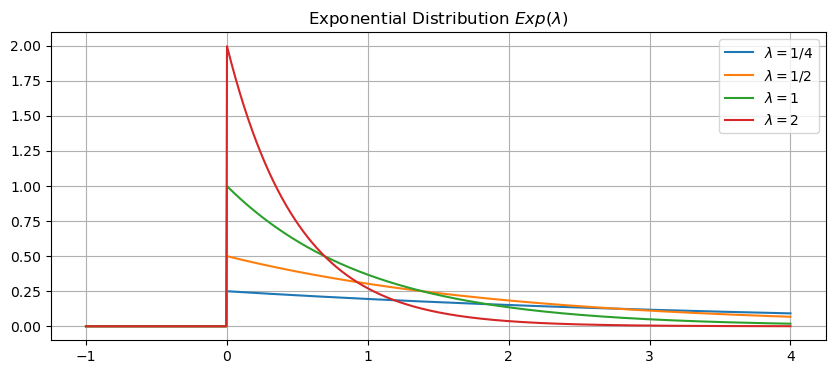

In [119]:
plt.figure(figsize=(10,4))
x = np.linspace(-1,4,1000)
exponential = lambda x,lam: lam*np.exp(-lam*x)*np.heaviside(x,1)
for lam in [.25,.5,1,2]:
    y = exponential(x,lam)
    plt.plot(x,y)
plt.title('Exponential Distribution $Exp(\lambda)$')
plt.legend(['$\lambda=1/4$','$\lambda=1/2$','$\lambda=1$','$\lambda=2$'])
plt.grid(True)
plt.show()

:::{seealso}
Check out [Wikipedia: Exponential Distribution](https://en.wikipedia.org/wiki/Exponential_distribution) for more information.
:::

## Example: Precipitation Data

The file `precipitation.csv` consists of daily precipitation measured at the Vancouver Airport from 1995 to 2023. Let's import the data, look the first few rows and then plot the histogram of precipitation.

In [150]:
df = pd.read_csv('precipitation.csv')
df.head()

,day,month,year,dayofyear,precipitation
0,13,4,2023,103,0.0
1,12,4,2023,102,0.0
2,11,4,2023,101,6.2
3,10,4,2023,100,0.0
4,9,4,2023,99,9.1


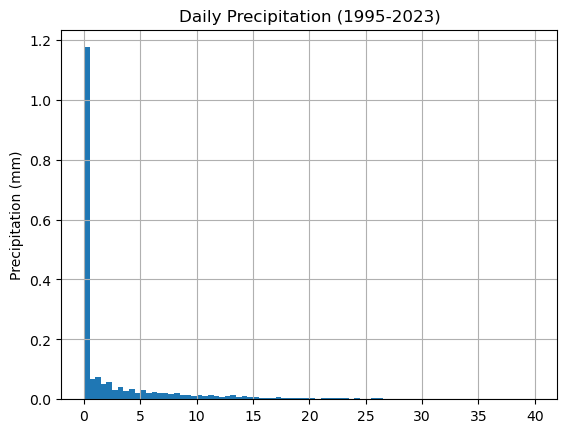

In [151]:
df['precipitation'].hist(bins=np.arange(0,40.5,0.5),density=True)
plt.ylabel('Frequency'), plt.ylabel('Precipitation (mm)')
plt.title('Daily Precipitation (1995-2023)')
plt.grid(True)
plt.show()

Let's focus on days with at least 2mm of precipitation:

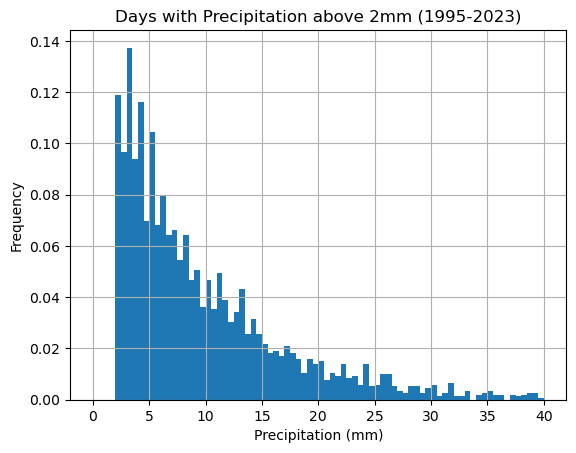

In [160]:
df = df[df['precipitation'] > 2]
df['precipitation'].hist(bins=np.arange(0,40.5,0.5),density=True)
plt.xlabel('Precipitation (mm)'), plt.ylabel('Frequency')
plt.title('Days with Precipitation above 2mm (1995-2023)')
plt.grid(True)
plt.show()

To fit an exponential distribution we need to shift the data:

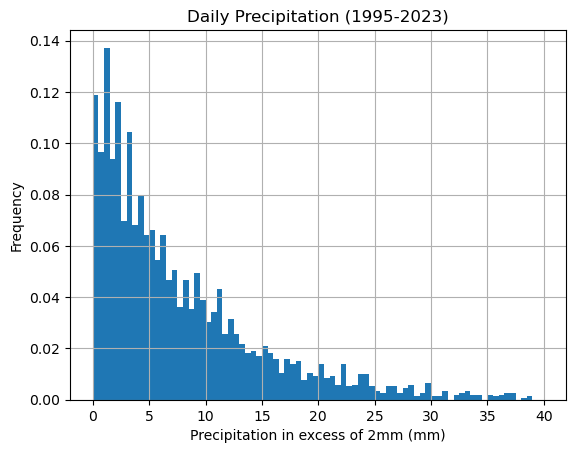

In [154]:
df['precipitation2'] = df['precipitation'] - 2
df['precipitation2'].hist(bins=np.arange(0,40.5,0.5),density=True)
plt.xlabel('Precipitation in excess of 2mm (mm)'), plt.ylabel('Frequency')
plt.title('Days with Precipitation above 2mm (1995-2023)')
plt.grid(True)
plt.show()

Compute the sample mean and variance:

In [155]:
mu = df['precipitation2'].mean()
sigma2 = df['precipitation2'].var()
print('mean =',mu,', variance =',sigma2)

mean = 8.064954486345904 , variance = 71.13641043695222


The sample mean provides an estimate of the parameter $\lambda$:

In [156]:
lam = 1/mu
print('lambda =',lam)

lambda = 0.12399326018429686


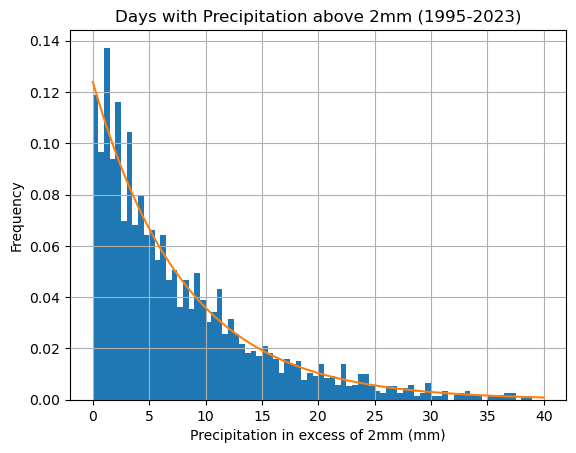

In [161]:
df['precipitation2'].hist(bins=np.arange(0,40.5,0.5),density=True)
x = np.linspace(0,40,200)
y = exponential(x,lam)
plt.plot(x,y)
plt.xlabel('Precipitation in excess of 2mm (mm)'), plt.ylabel('Frequency')
plt.title('Days with Precipitation above 2mm (1995-2023)')
plt.grid(True)
plt.show()

Finally, shift the data back again to better present the results:

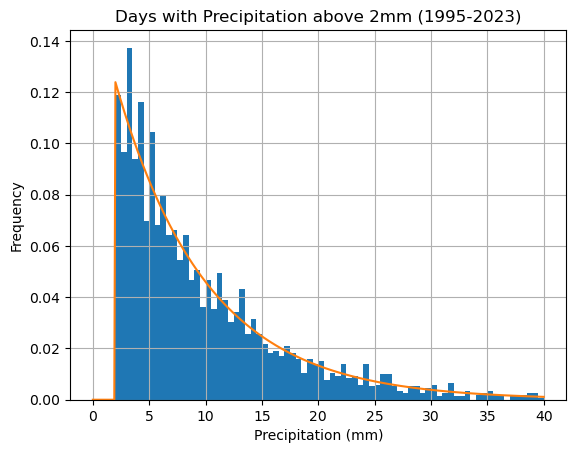

In [163]:
df['precipitation'].hist(bins=np.arange(0,40.5,0.5),density=True)
x = np.linspace(0,40,400)
y = exponential(x-2,lam)
plt.plot(x,y)
plt.title('Days with Precipitation above 2mm (1995-2023)')
plt.xlabel('Precipitation (mm)'), plt.ylabel('Frequency')
plt.grid(True)
plt.show()